# Lab2: Data analysis

Throughout all the following labs, we will work on the following problem: 

**Is it possible to predict which Pokemon is legendary given their attributes ?**

We will begin by analyzing it using `pandas` and plot the data using `matplotlib` and `seaborn`.

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## Load dataset
The dataset is available in its `csv` format.

In [3]:
df = pd.read_csv("../pokemon.csv")
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


## Identify rows and columns
1. Find the number of rows and the number of columns

In [4]:
df.shape

(801, 41)

2. List every column name and give a brief description of the data, helping yourself with the [kaggle description](https://www.kaggle.com/datasets/rounakbanik/pokemon) of the dataset.

In [5]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

3. Specify for each column the data type and create a list `quantitative_vars` that will contain the names of the quantitative variables and `qualitative_vars` that will contain the names of the qualitative variables.

In [7]:
qualitative_vars = ["abilities", "classfication", "pokedex_number", "japanese_name", "name", "type1", "type2","generation"]
quantitative_vars = [col for col in df.columns if col not in qualitative_vars + ["is_legendary"]]

**3. Bonus question** Create new variables that seem relevant for your analysis.

The `abilities` feature is annoying as it takes many different values that will impact the analysis.
We can disjoin them into several columns (but the drawbacks will be that we have more missing values ... up to you to make the right decision).

In [8]:
def disjoin_list(input_list, ix):
    """List to disjoin and the index of the element to use.
    """
    # The input list is a list of characters
    parsed_list = input_list.replace("[", "").replace("]", "").split(",")
    try:
        return parsed_list[ix]
    except IndexError:
        return np.nan


df["ability_1"] = df["abilities"].apply(lambda x: disjoin_list(x, 0))
df["ability_2"] = df["abilities"].apply(lambda x: disjoin_list(x, 1))
df["ability_3"] = df["abilities"].apply(lambda x: disjoin_list(x, 2))

4. What column are we trying to predict ? Store it into a list `target`.

In [9]:
target = df["is_legendary"]

5. Infer what columns will be used for prediction and what column you can omit immediately. Create the corresponding list `features` and update `quantitative_vars` and `qualitative_vars`.

In [10]:
qualitative_vars = [var for var in qualitative_vars if var not in ["name", "japanese_name", "pokedex_number"]]

features = df[qualitative_vars+quantitative_vars]

In [11]:
features.head()

,abilities,classfication,type1,type2,generation,against_bug,against_dark,against_dragon,against_electric,against_fairy,...,capture_rate,defense,experience_growth,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg
0,"['Overgrow', 'Chlorophyll']",Seed Pokémon,grass,poison,1,1.0,1.0,1.0,0.5,0.5,...,45,49,1059860,0.7,45,88.1,65,65,45,6.9
1,"['Overgrow', 'Chlorophyll']",Seed Pokémon,grass,poison,1,1.0,1.0,1.0,0.5,0.5,...,45,63,1059860,1.0,60,88.1,80,80,60,13.0
2,"['Overgrow', 'Chlorophyll']",Seed Pokémon,grass,poison,1,1.0,1.0,1.0,0.5,0.5,...,45,123,1059860,2.0,80,88.1,122,120,80,100.0
3,"['Blaze', 'Solar Power']",Lizard Pokémon,fire,NaN,1,0.5,1.0,1.0,1.0,0.5,...,45,43,1059860,0.6,39,88.1,60,50,65,8.5
4,"['Blaze', 'Solar Power']",Flame Pokémon,fire,NaN,1,0.5,1.0,1.0,1.0,0.5,...,45,58,1059860,1.1,58,88.1,80,65,80,19.0


6. Give the repartition of the target to predict using the `value_counts` method. How many pokemons are legendary ?


In [12]:
target.value_counts()

is_legendary
0    731
1     70
Name: count, dtype: int64

## Univariate analysis

1. For each **quantitative variables** (that you should have stored in the variable `quantitative_vars`), give the main statistical estimators: mean, median, standard error.



In [13]:
df[quantitative_vars].describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,base_total,defense,experience_growth,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,8.010000e+02,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,781.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,428.377029,73.008739,1.054996e+06,1.163892,68.958801,55.155761,71.305868,70.911361,66.334582,61.378105
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,119.203577,30.769159,1.602558e+05,1.080326,26.576015,20.261623,32.353826,27.942501,28.907662,109.354766
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,180.000000,5.000000,6.000000e+05,0.100000,1.000000,0.000000,10.000000,20.000000,5.000000,0.100000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,320.000000,50.000000,1.000000e+06,0.600000,50.000000,50.000000,45.000000,50.000000,45.000000,9.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,435.000000,70.000000,1.000000e+06,1.000000,65.000000,50.000000,65.000000,66.000000,65.000000,27.300000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,505.000000,90.000000,1.059860e+06,1.500000,80.000000,50.000000,91.000000,90.000000,85.000000,64.800000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,780.000000,230.000000,1.640000e+06,14.500000,255.000000,100.000000,194.000000,230.000000,180.000000,999.900000


2. For each **quantitative variables** (that you should have stored in the variable `quantitative_vars`), plot the variable repartitions using `sns.histplot` and `sns.violinplot`. Deduce for each variable a possible distribution.

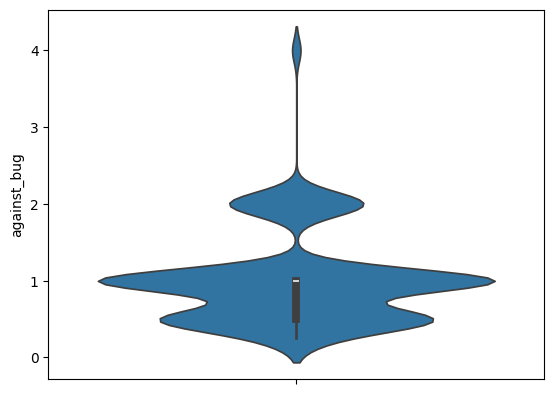

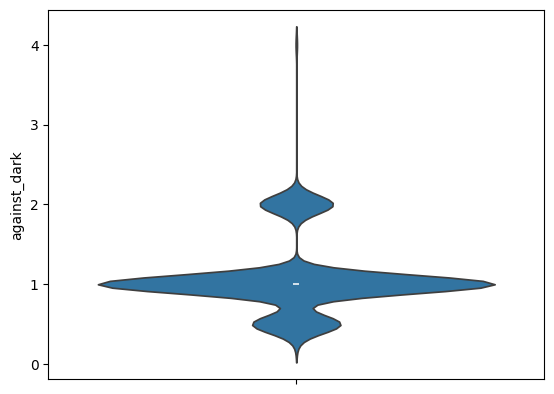

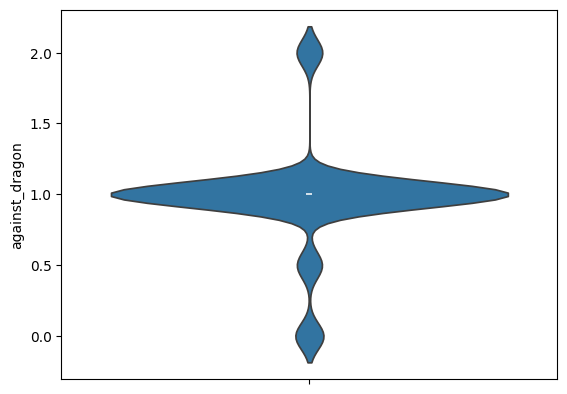

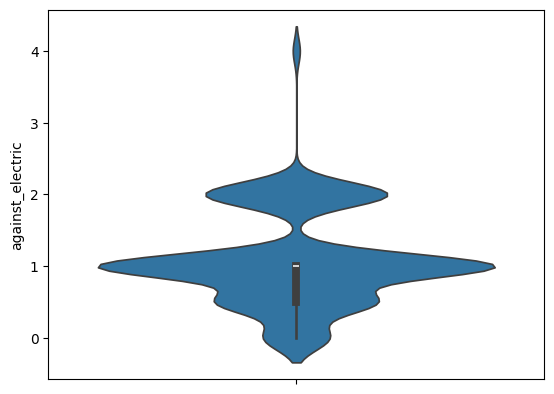

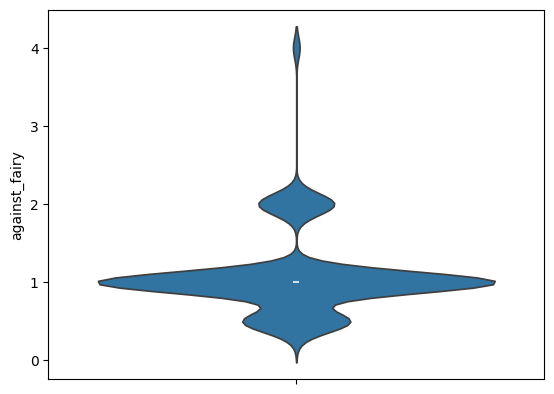

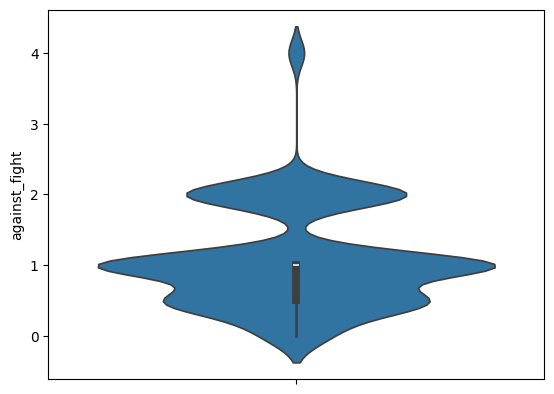

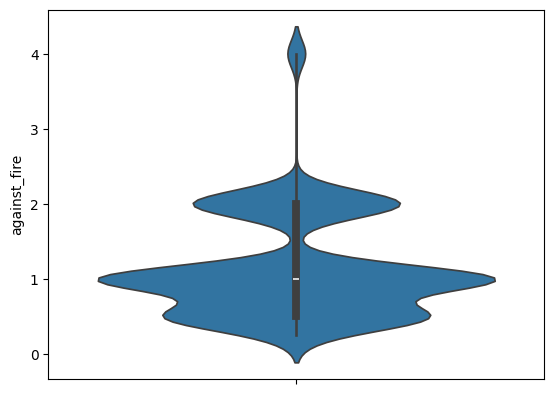

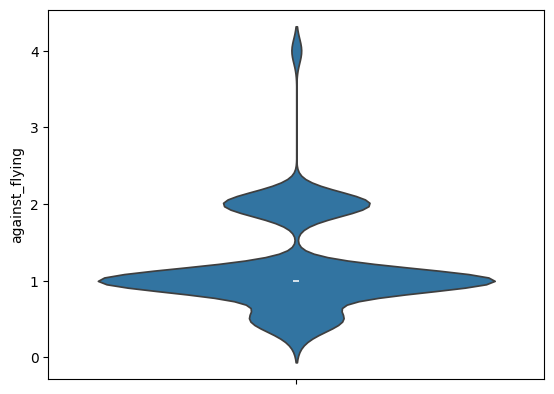

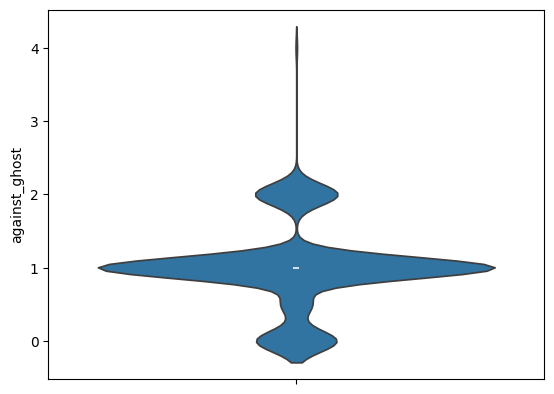

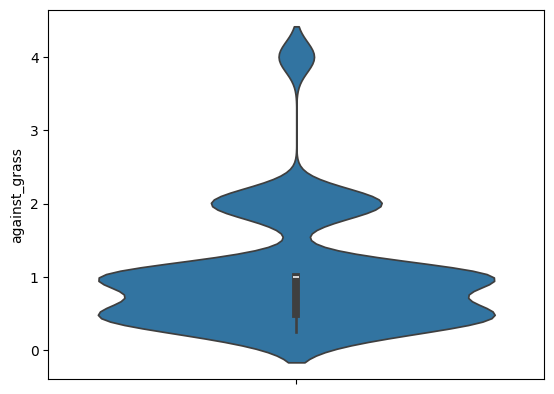

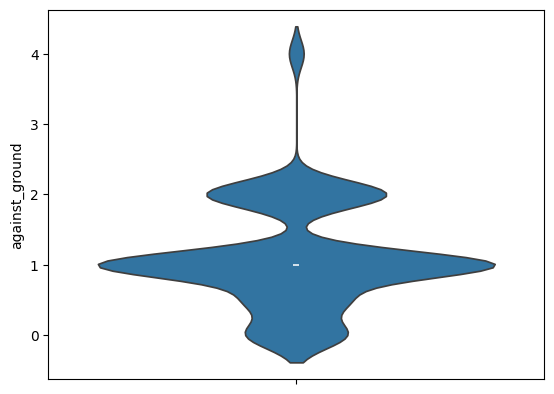

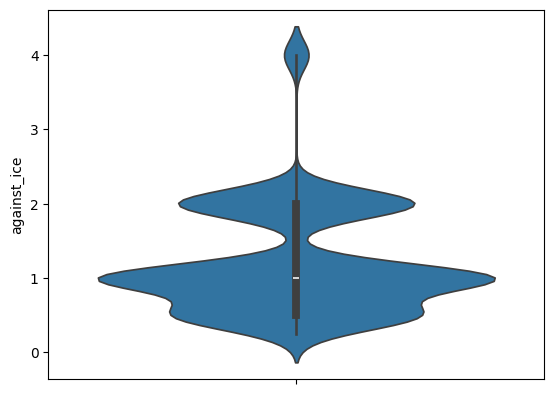

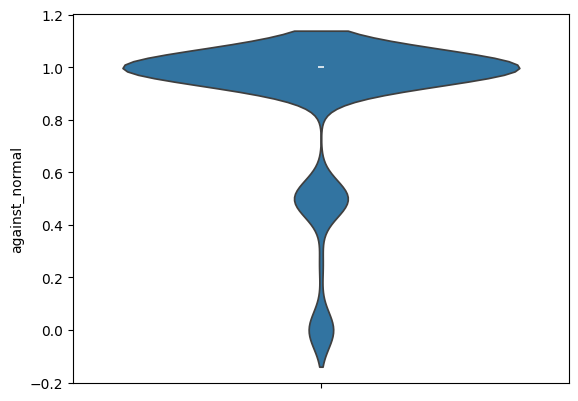

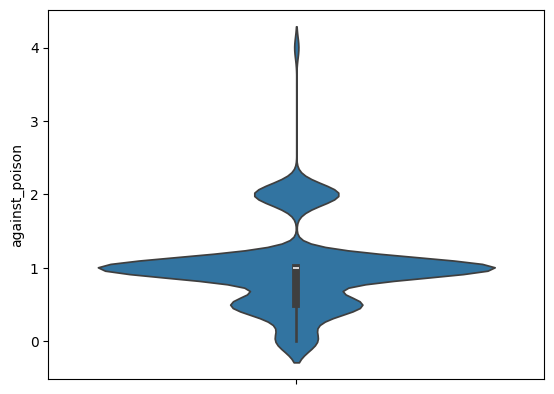

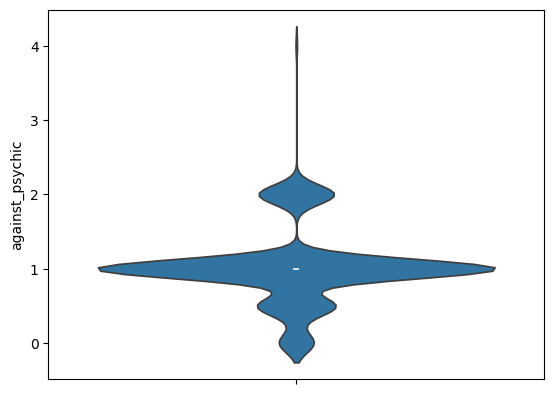

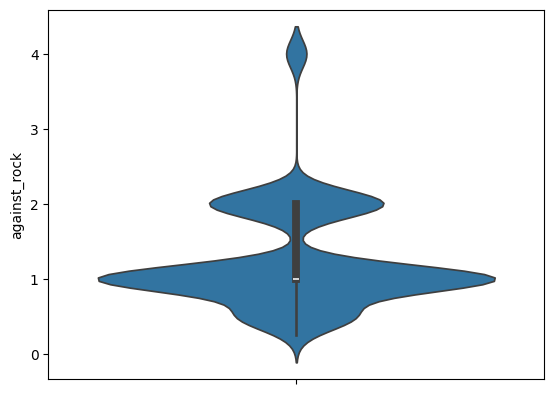

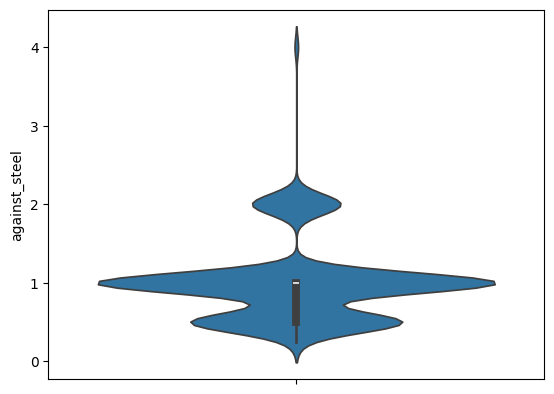

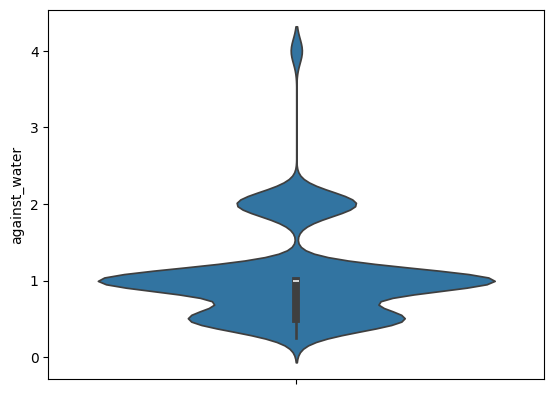

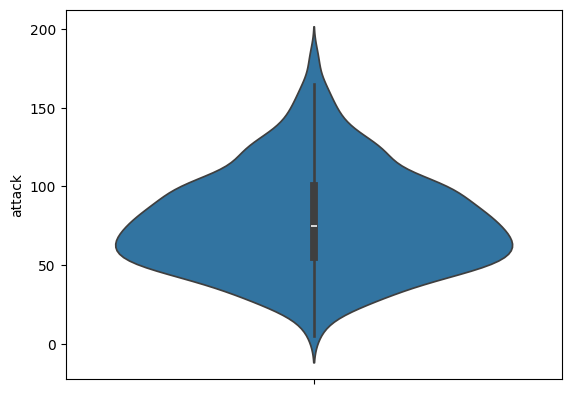

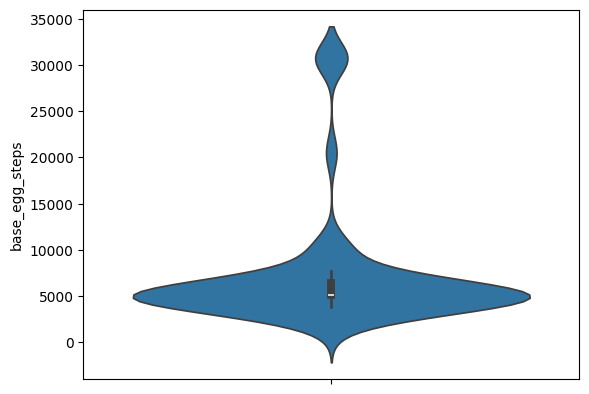

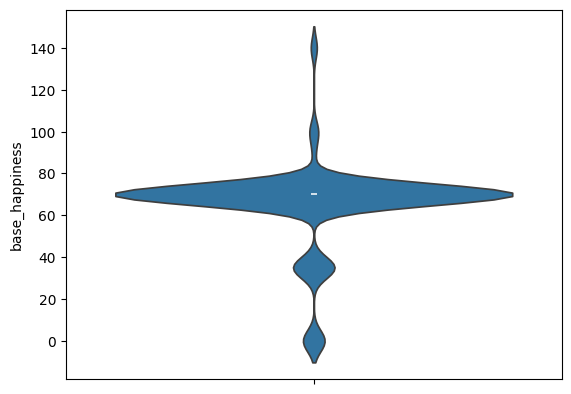

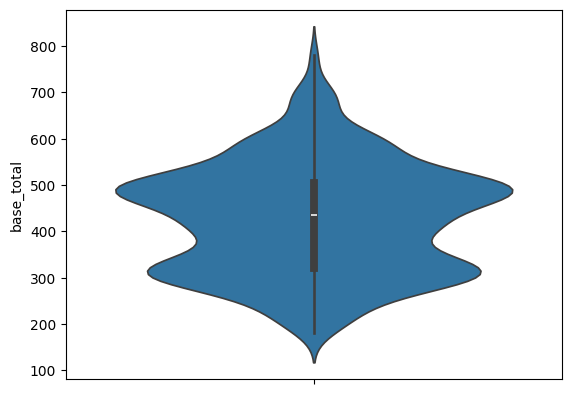

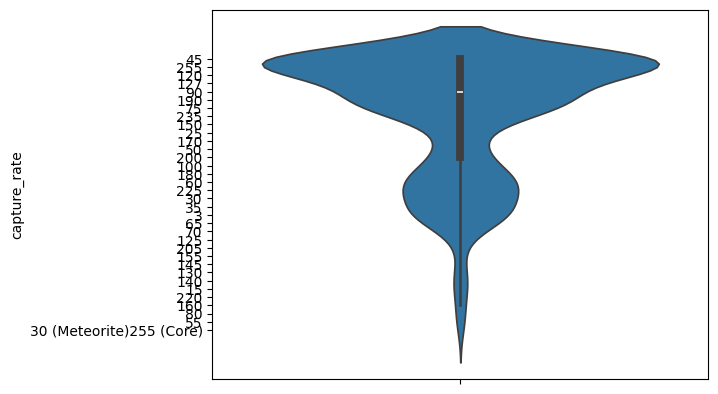

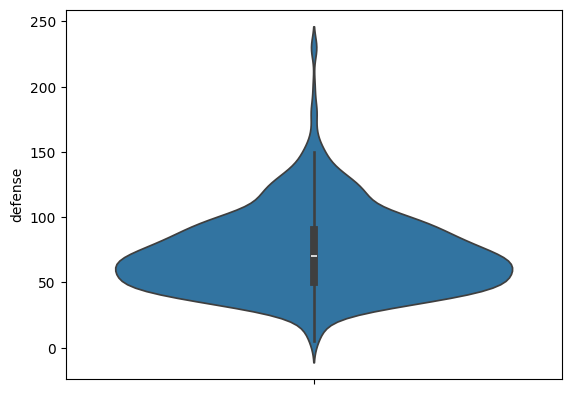

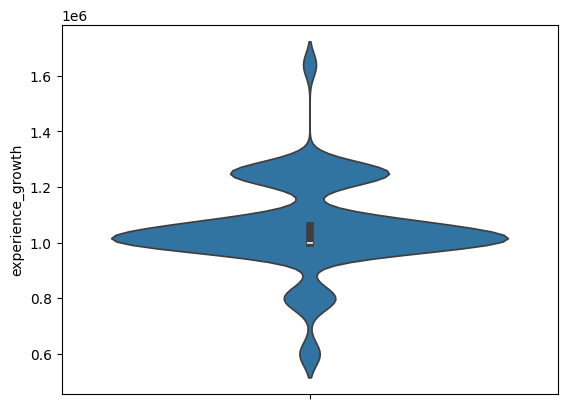

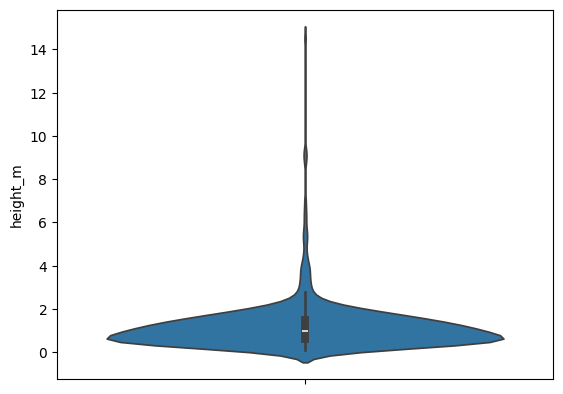

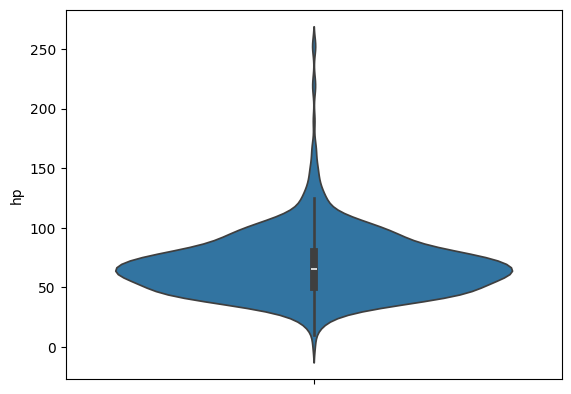

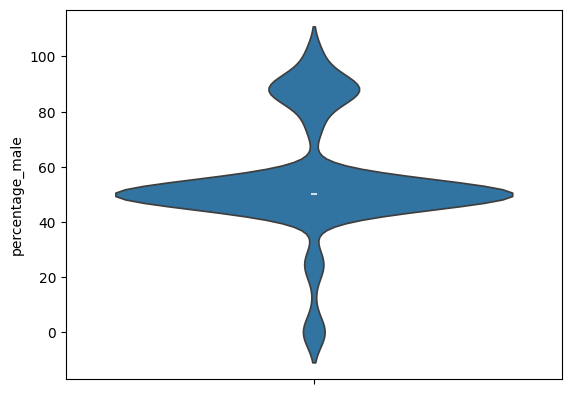

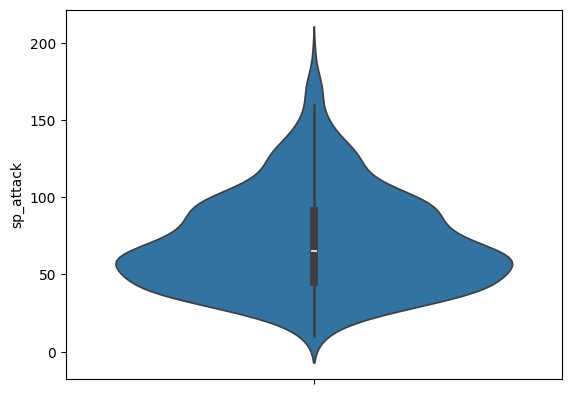

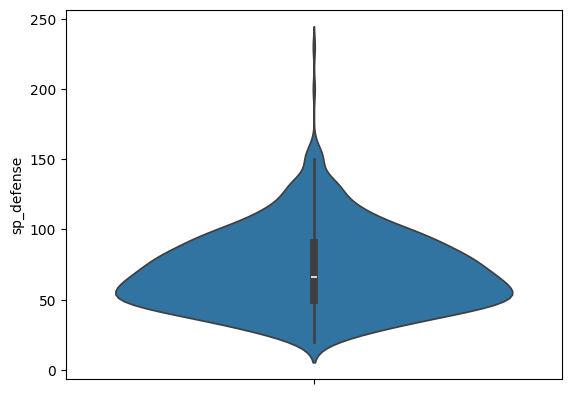

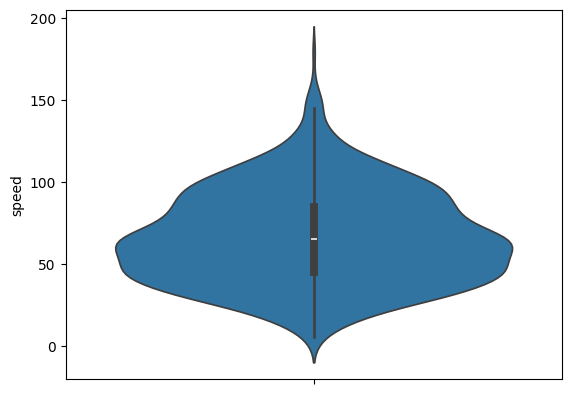

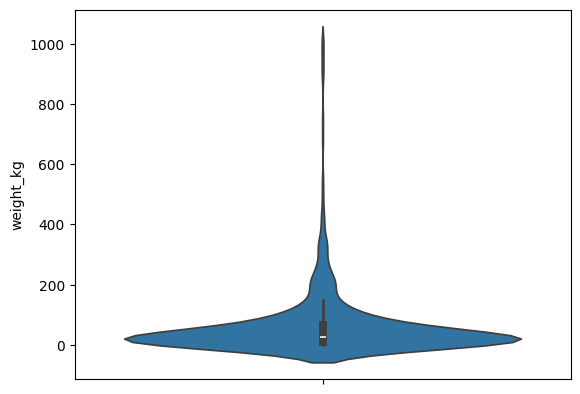

In [14]:
for var in quantitative_vars:
    sns.violinplot(df[var])
    plt.show()

3. For each **qualitative variables** (that you should have stored in the variable `qualititative_vars`), provide the different values that can be taken by the variable and count the number of individuals per category.

In [15]:
for var in qualitative_vars:
    print(df[var].value_counts())

abilities
['Levitate']                                     29
['Beast Boost']                                   7
['Shed Skin']                                     5
['Justified']                                     4
['Poison Point', 'Rivalry', 'Hustle']             4
                                                 ..
['Swift Swim', 'Oblivious', 'Adaptability']       1
['Shed Skin', 'Infiltrator']                      1
['Immunity', 'Toxic Boost']                       1
['Hyper Cutter', 'Arena Trap', 'Sheer Force']     1
['Soul-Heart']                                    1
Name: count, Length: 482, dtype: int64
classfication
Dragon Pokémon        8
Mouse Pokémon         6
Mushroom Pokémon      6
Flame Pokémon         5
Balloon Pokémon       5
                     ..
Marionette Pokémon    1
Puppet Pokémon        1
Color Swap Pokémon    1
Weather Pokémon       1
Artificial Pokémon    1
Name: count, Length: 588, dtype: int64
type1
water       114
normal      105
grass        78
bug     

## Multivariate analysis

### Correlation of variables

1] Using the `.corr()` method, find and analyze correlations between features. What can you deduce regarding features independence ?

In [16]:
df[quantitative_vars].corr()

ValueError: could not convert string to float: '30 (Meteorite)255 (Core)'

In [17]:
# Oh no, there seems to be a variable I have stored as quantitative that is actually qualitative

def check_numeric(x):
    """Check if a value is numeric, else prints it.
    """
    try:
        int(x)
    except ValueError:
        print(x)


for var in quantitative_vars:
    if sum(df[var].apply(lambda x: type(x) in [int, float])) != df[var].shape[0]:
        print(f"{var} is not fully numeric.")
        print("Non numeric value is : ")
        df[var].apply(lambda x: check_numeric(x))


# Let's transform it into a numeric variable ... what else could I do ?
df["capture_rate"] = df["capture_rate"].apply(lambda x: x.split(" ")[0] if type(x) not in [int, float] else x).astype(float)

capture_rate is not fully numeric.
Non numeric value is : 
30 (Meteorite)255 (Core)


2] Plot the correlogram and perform a quick analysis of relationship between variables using `sns.pairplot`. Understand graph per graph what is represented and deduce from it the relationship between features and what feature seems to be important for prediction.

<Axes: >

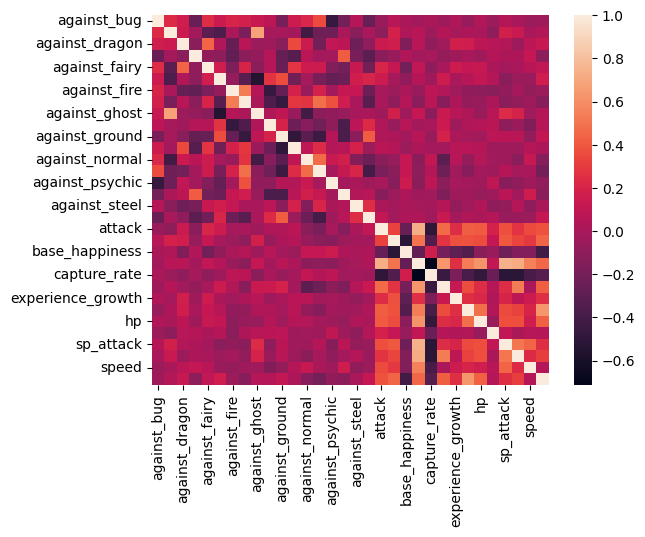

In [18]:
sns.heatmap(
    df[quantitative_vars].corr()
)

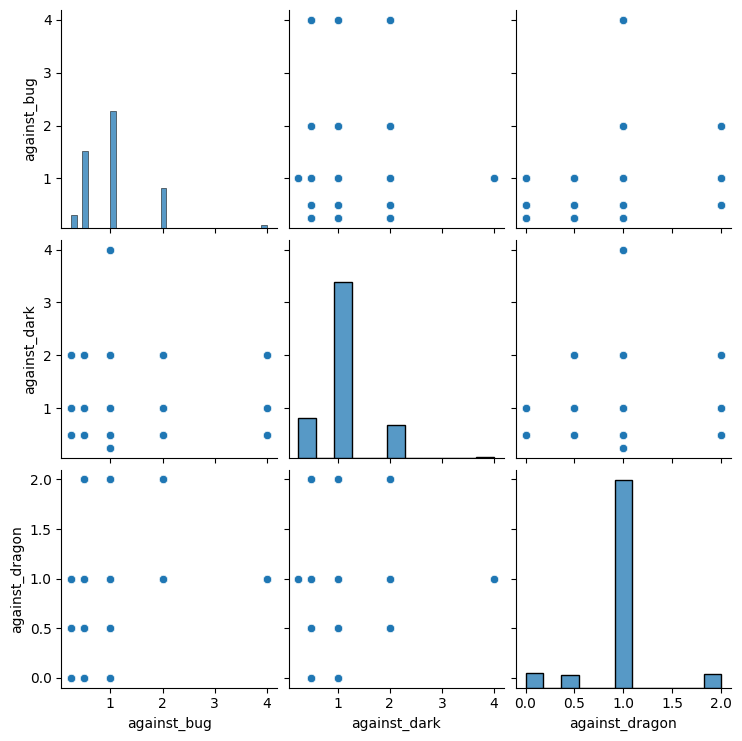

In [19]:
sns.pairplot(df[quantitative_vars[:3]])

**3] Bonus question**: use the `sns.pairplot` function to check the correlation between qualitative variables as well.

### Impact of variables/features on target

The goal of our study is to **predict the target is_legendary**, so we need to analyze the relationship between this target and the features.

1] Find the statistical repartition of **quantitative variables** (that you should have stored in the variable `quantitative_vars`) for legendary and non-legendary pokemons and plot it using `sns.boxplot()`. 

t-test


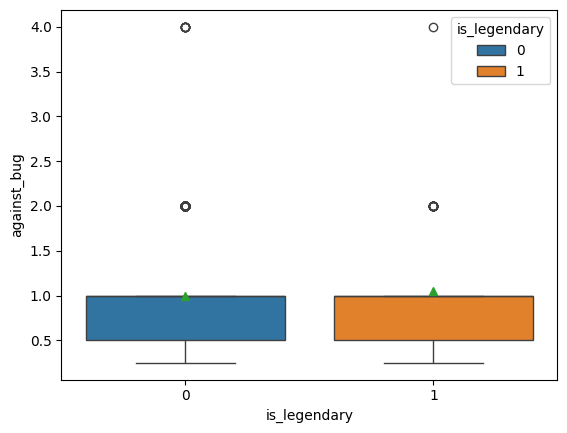

t-test


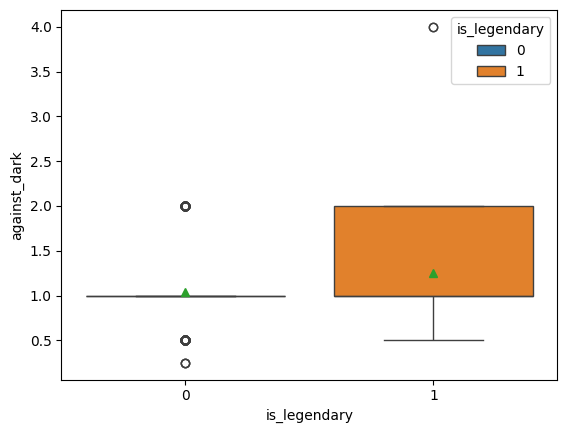

t-test


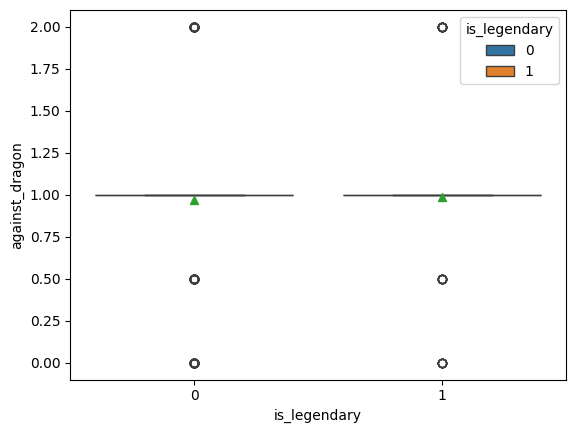

t-test


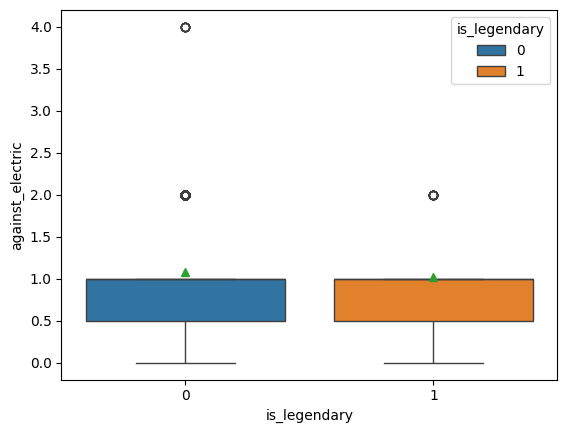

t-test


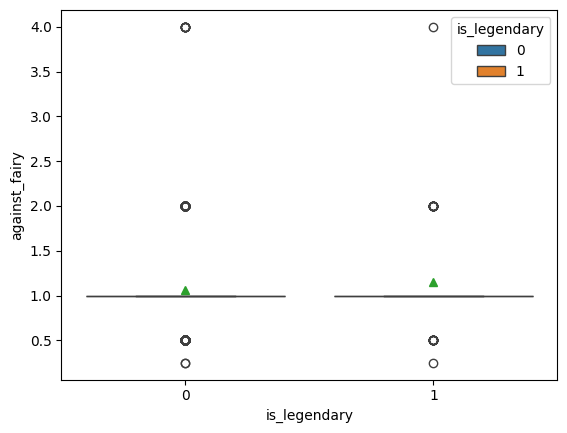

t-test


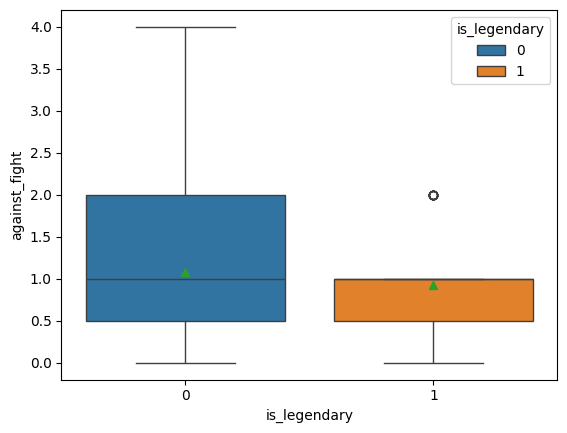

t-test


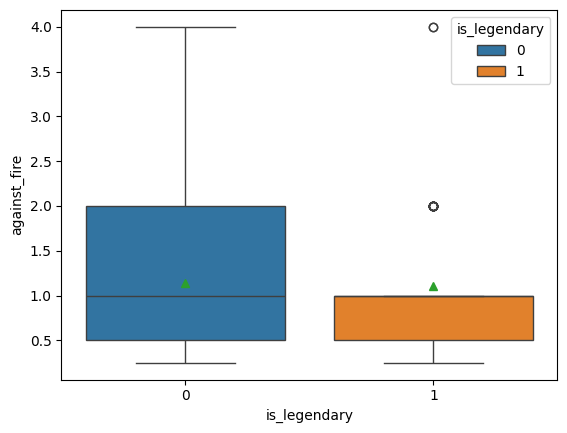

t-test


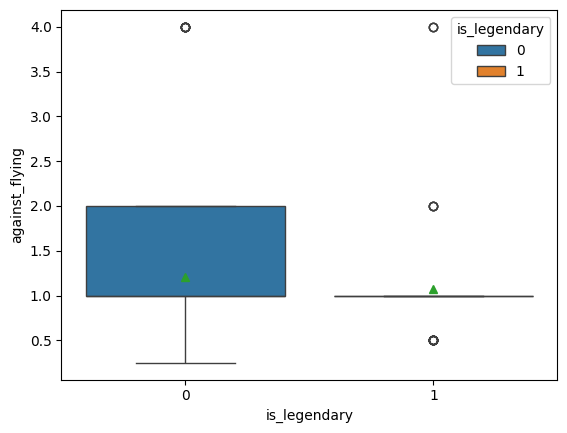

t-test


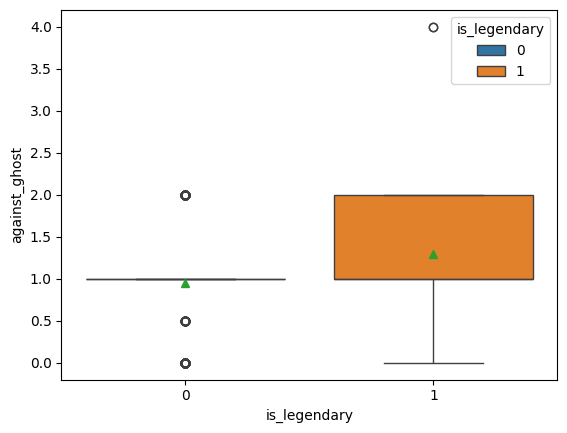

t-test


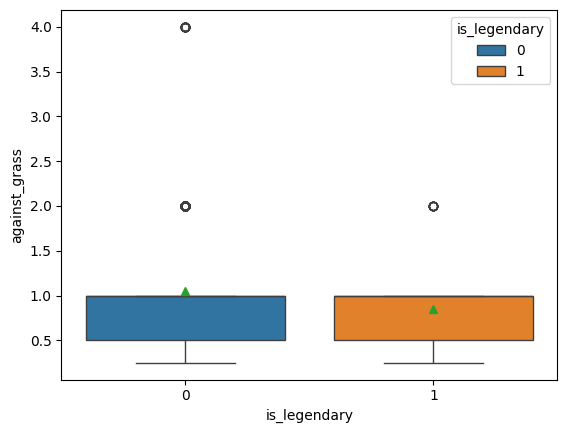

t-test


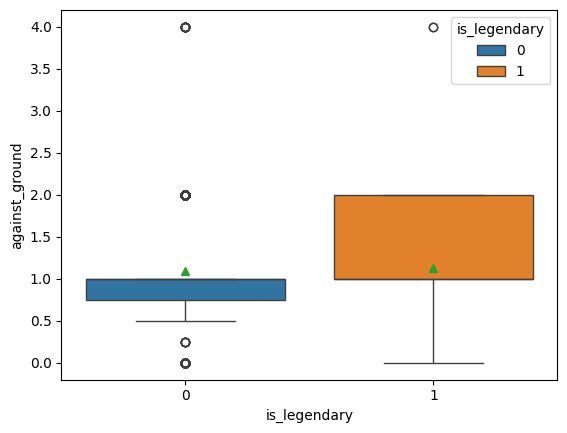

t-test


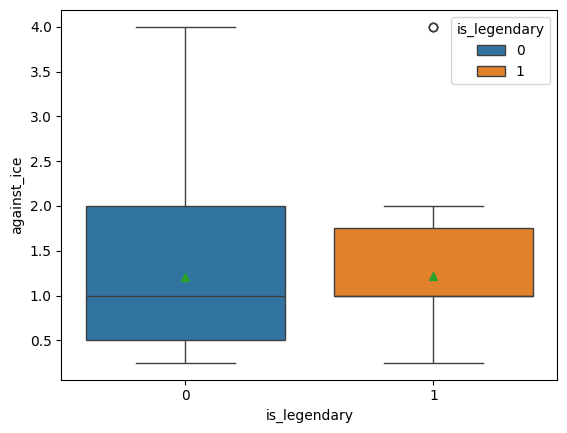

t-test


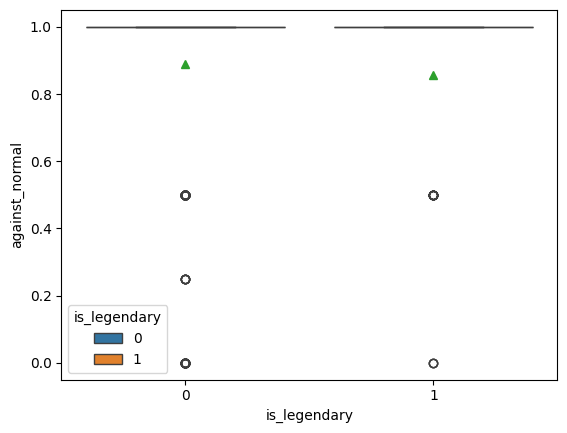

t-test


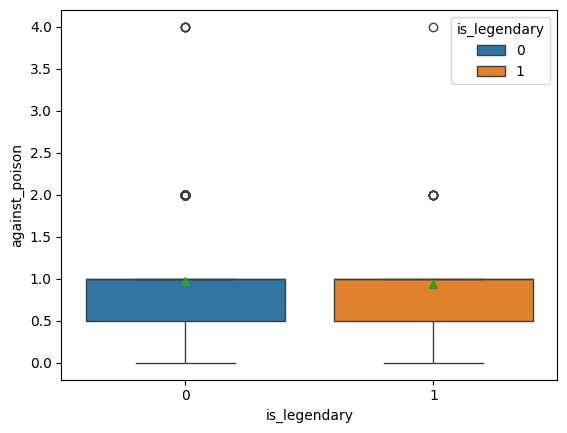

t-test


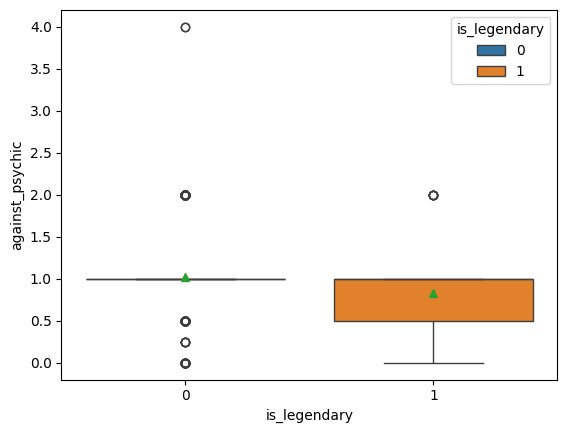

t-test


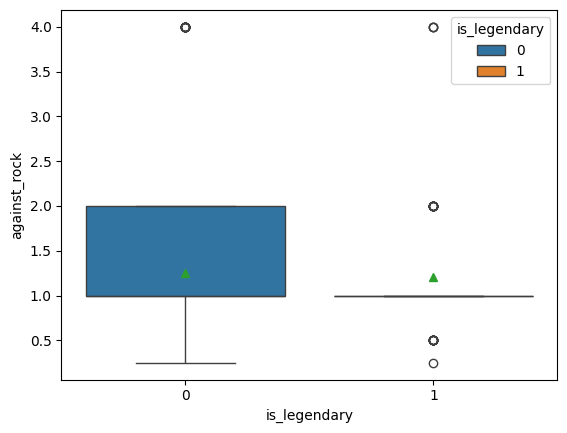

t-test


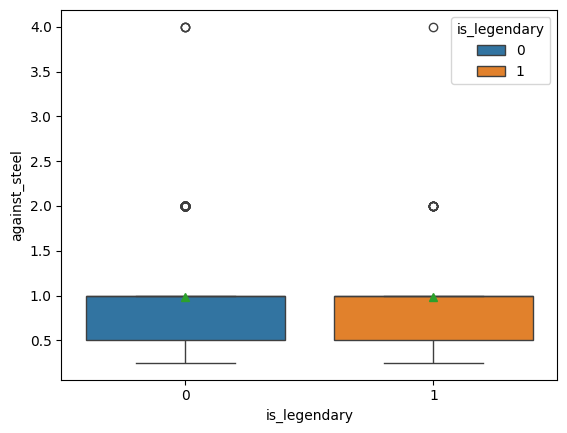

t-test


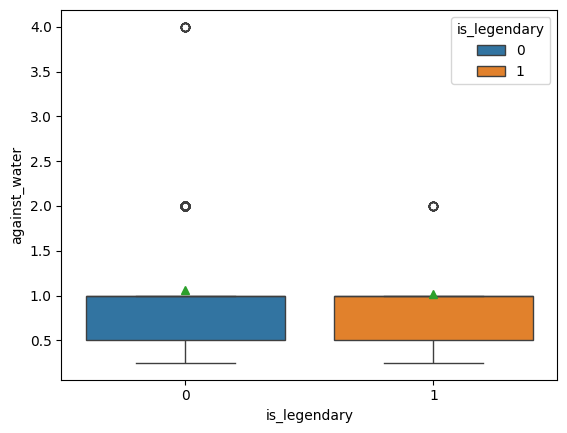

t-test


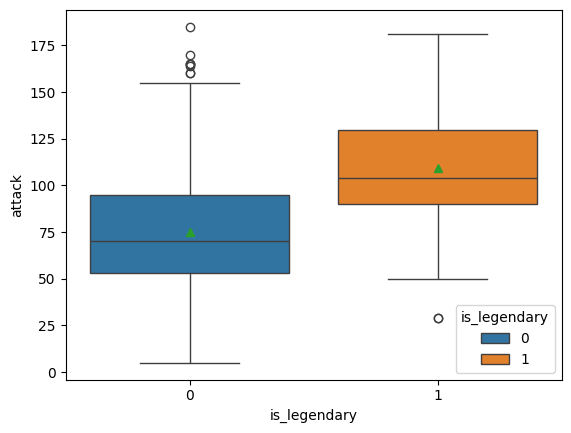

t-test


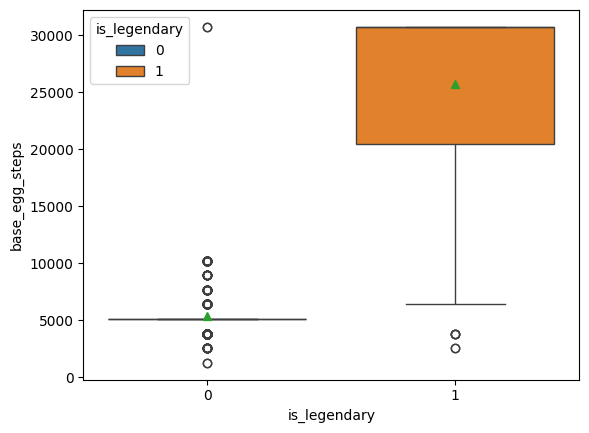

t-test


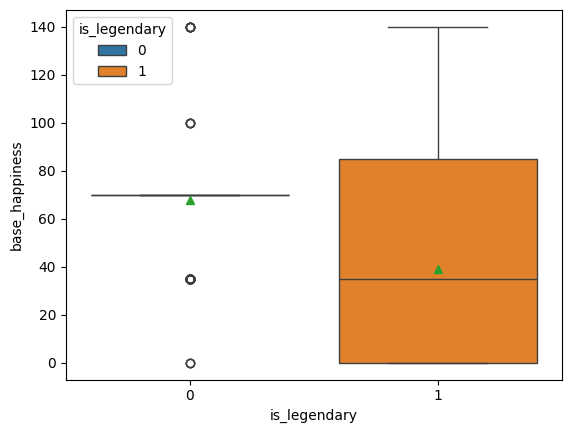

t-test


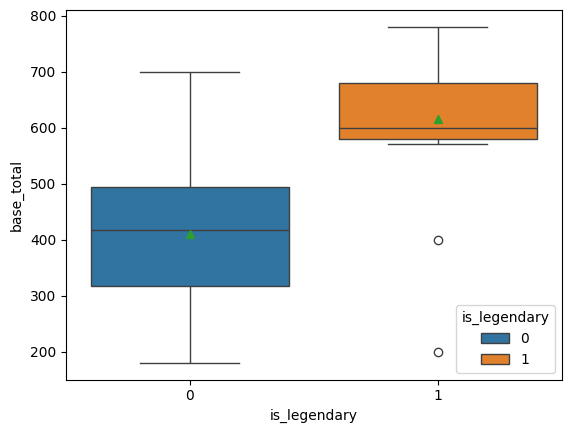

t-test


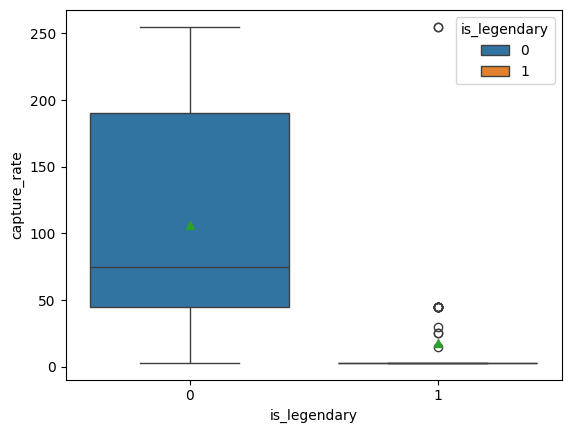

t-test


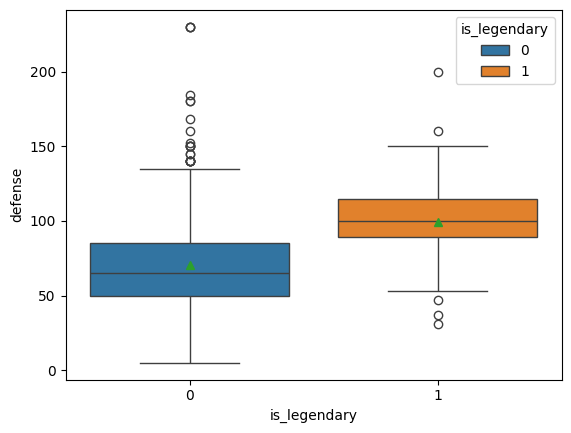

t-test


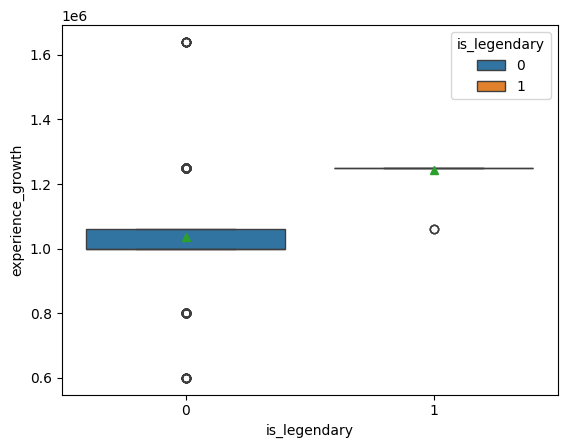

t-test


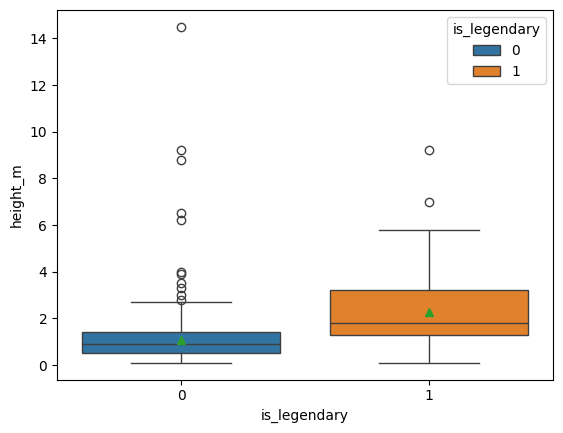

t-test


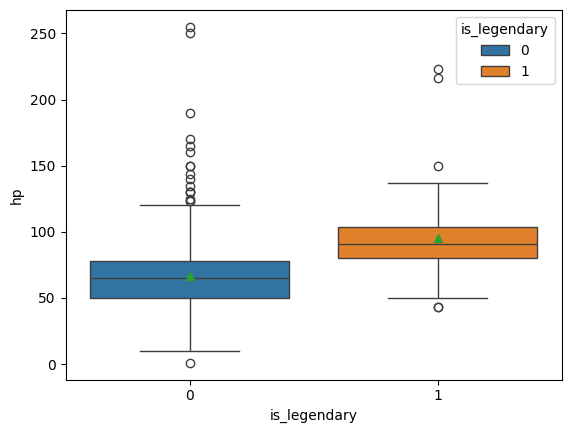

t-test


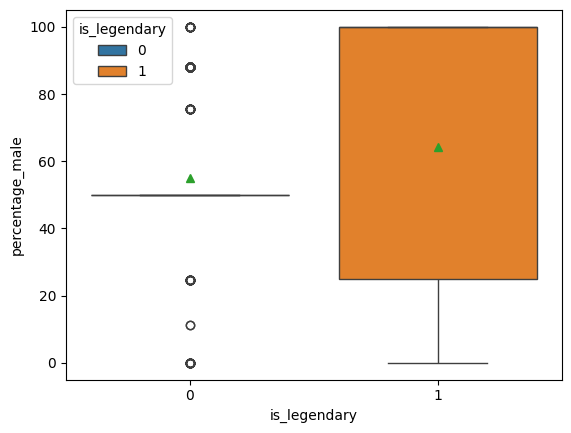

t-test


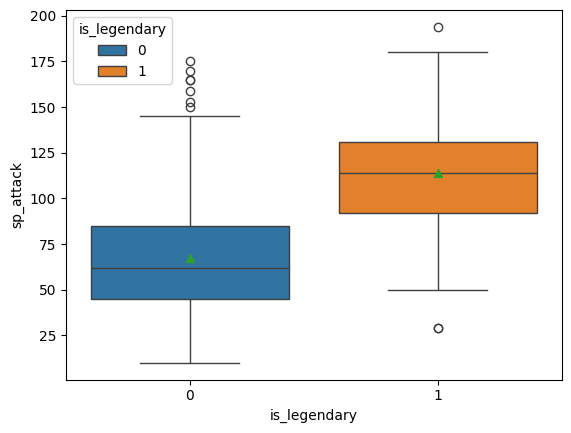

t-test


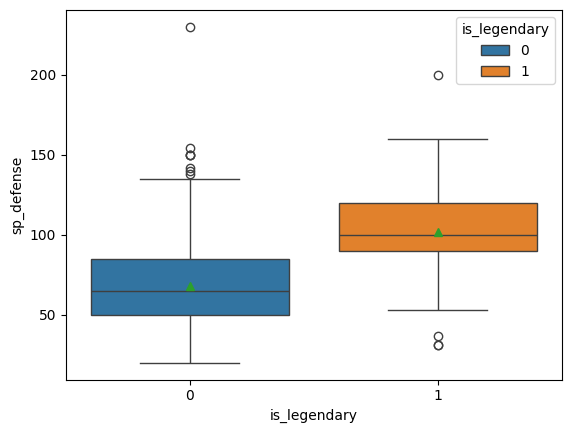

t-test


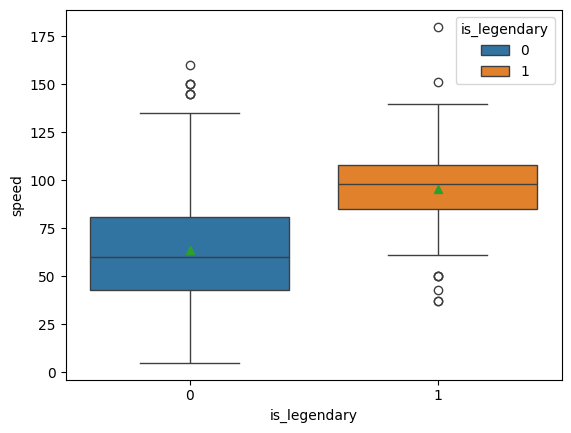

t-test


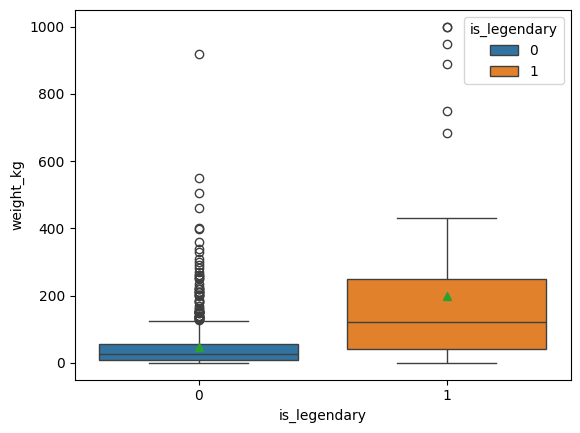

In [20]:
from scipy import stats

impact_vers = []

for var in quantitative_vars:
    sns.boxplot(y=df[var], x=target, hue=target, showmeans=True)
    print("t-test")
    if (stats.ttest_ind(
        df[var][target == 1],
        df[var][target == 0]
    ).pvalue) < 0.1:
        impact_vers.append(var)
    plt.show()

2] Find the statistical repartition of is_legendary for each **categorical variable** (that you should have stored in the variable `qualitative_vars`) and plot it using the `sns.barplot()` function.

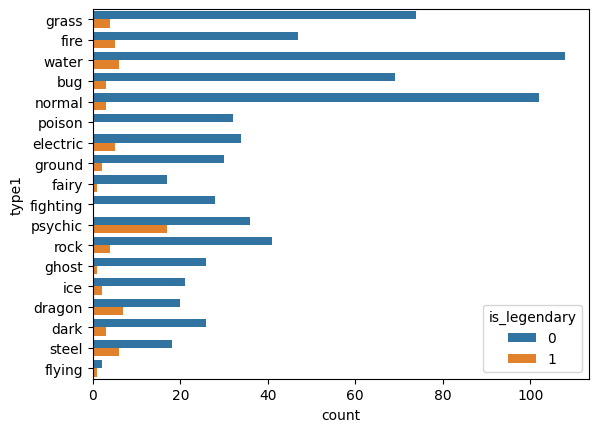

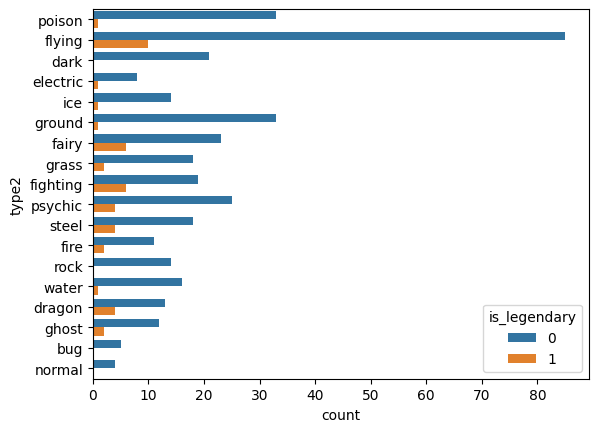

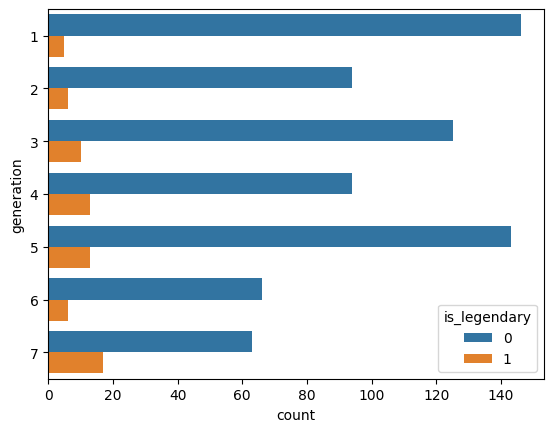

In [24]:
for var in qualitative_vars:
    # Drop abilities and classification as there are too many values for proper analysis
    if var not in ["abilities", "classfication"]:
        sns.countplot(y=df[var], hue=target)
        plt.show()

## Dealing with missing values

1] Have you noticed anything in particular with missing values ?

There are some missing values.

2] Find rows with missing values using the `df.isna()`` method and perform a statistical analysis on the number of missing values.

In [25]:
df.isna().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


3] Suggest possible ways to deal with missing values and apply it to the data.

We can replace the data with the mean (or the median) of the rest of the columns in the case of quantitative variables.
For qualitative variables, we can use the most frequent label.

In [26]:
sum(df[var].isna())

0

In [27]:
for var in quantitative_vars:
    if sum(df[var].isna()) > 0:
        df.loc[df[var].isna(), var] = df[var].mean()
        # or if you prefer the median
        # df.loc[df[var].isna(), var] = df[var].median()

## Conclusions and next steps

1. What seems to be the most impacting features in the dataset to predict what Pokemon is legendary ?


**Bonus**: can you give a way to check this affirmation ?

2. Do you think some metrics could be removed from the dataset without information loss ?


4. Store this new dataset into a csv file `pokemon_preprocessed` (using the `to_csv` method) and save it for the next lab.